# Software Management

In addition to writing a program for each computing task, knowldge and skills are needed for designing and managing the entire data analysis or simulation procedure, testing and revising the codes, and sharing the data and tools among collaborators.

Unlike commercial software development, research computing often starts from a simple exploratory code created by a single researcher. However, even for a single-person project, it is beneficial to follow the standard practices in software development because.
* If your project is successful, it will be succeeded by other members of your lab or the research community world wide.
* You, after a few months, do not remember where you put which file, what was this file, or why you wrote this code.

#### Reference:
* Greg Wilson, et al. (2017). Good enough practices in scientific computing. PLOS Computational Biology, 13(6): e1005510 (https://doi.org/10.1371/journal.pcbi.1005510)

## Coding Style

In writing programs, keep in mind:
* Make them *modular* and aviod duplicate codes.
* Give explanation at the beginning of each file/function.
* Use file/function/variable names that you can comprehend a year later.
* Never write a numeric parameter in an equation; define it as a variable/argument.
* Give comments for significant parts/lines of codes.
* Turn comment/uncomment into `if-else` for different modes of operation.
* Verify your code with a simple input for which the correct output is known.
* Prepare documentation even before somebody asks you, as you yourself will need that after a few months.

In some projects, all you need is to download pre-existing tools and apply them to the data. Even in that case, it is better to record the procedure as a *script* for
* avioding/detecting manual errors
* reproducibility of the result
* re-analysis with new data, tool, or parameters

### Scritping
On Unix-like systems, the common way is a *shell script*, which is a file containing a series of commands you would type into a terminal.

For a more elaborate processing, a Python script is often preferred.

## Version Control System
Software development is repetitions of coding, testing, and improving. A version control system (VCS) allows
* parallel development of parts and re-integration
* trace back to previous versions when a problem is detected

## Git

The most popular VCS today is *Git*, created by Linus Torvalds for developing Linux. 

After creating/editing your files, you *stage* them for management and *commit* for a certain version.

![commit](figures/git_commit.png)

If `git` has not been installed, follow one of these to install.

Mac: 
* Install [XCode](https://developer.apple.com/jp/xcode/) from the *App Store*
* or install *XCode Command Line Tools* by `xcode-select --install`
* or install [HomeBrew](https://brew.sh) and run `brew install git`

Windows: 
* Install [Git for Windows](https://gitforwindows.org)

Detailed documentations can be found at https://git-scm.com/docs

## odesim

As an example of version control, let us take a simple ODE simulator, *odesim*

In [1]:
%ls odesim

__pycache__/ first.py     odesim.py    odesim.py~   second.py


In [2]:
%cd odesim

/Users/doya/Dropbox (OIST)/Python/iSciComp/odesim


In [3]:
%cat odesim.py

# odesim.py
# An Ordinary Differential Equation Simulator
# 2022 by Kenji Doya

import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt

import importlib  # import module from string

class odesim():
    """An ODE Simulator"""
    time = 0
    trun = 10
    dt = 0.1
    
    def __init__(self, odename):
        """create a new ODE"""
        print('Importing ODE:', odename)
        self.ode = importlib.import_module( odename)
        importlib.reload(self.ode) # for updated module
        self.state = self.ode.initial_state
        #self.reset()
        plt.ion()

    def reset(self):
        """reset the state"""
        self.time = 0
        self.state = self.ode.initial_state
        plt.clf()

    def simulate(self):
        """simulate the ODE"""
        # +dt/2 to include time+trun
        self.t = np.arange(self.time, self.time+self.trun+self.dt/2, self.dt)
        self.y = odeint(self.ode.dynamics, self.state, self.t, args=(self.ode.parameters,))


Here is its example usage

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import odesim
import importlib
#importlib.reload(odesim)  # when odesim.py is updated

In [6]:
sim = odesim.odesim('first')

Importing ODE: first


t= 10.0 ; state= [-0.36787947]


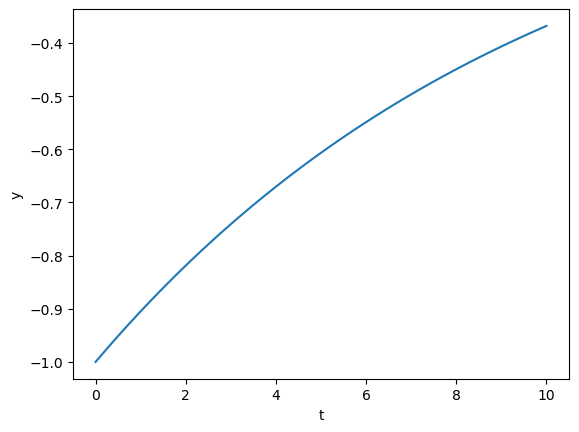

In [7]:
sim.run()

In [8]:
sim2 = odesim.odesim('second')

Importing ODE: second


t= 10.0 ; state= [ 0.52920895 -0.32397961]


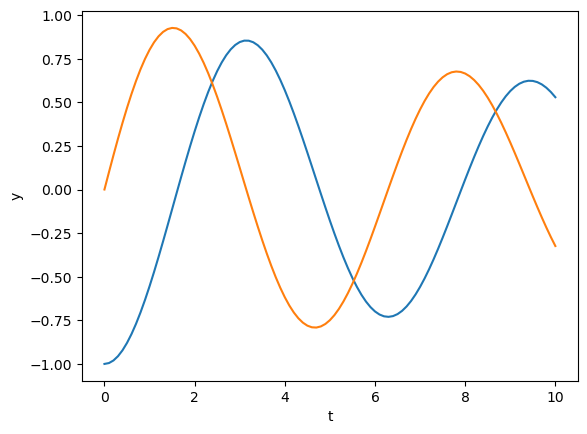

In [9]:
sim2.run()

### Starting a repository

Let us go to your working folder and start a new repository by `git init`

In [10]:
%pwd

'/Users/doya/Dropbox (OIST)/Python/iSciComp/odesim'

In [11]:
!git init

Reinitialized existing Git repository in /Users/doya/Dropbox (OIST)/Python/iSciComp/odesim/.git/


This creates an invisible folder `.git` for book keeping.

In [12]:
%ls -a

./           .git/        __pycache__/ odesim.py    second.py
../          .gitignore   first.py     odesim.py~


In [13]:
# The contents of .git folder
%ls .git

COMMIT_EDITMSG  config          index           objects/
HEAD            description     info/           refs/
ORIG_HEAD       hooks/          logs/


You can check the status by `git status`

In [14]:
!git status

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   odesim.py

no changes added to commit (use "git add" and/or "git commit -a")


### Staging and Commiting files

Use `git add` to add files for tracking.

And then `git commit` to save a version.

![commit](figures/git_commit.png)

In [15]:
!git add *.py
!git status

On branch main
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   odesim.py



Register the current version by `git commit` with a message by `-m`.

In [16]:
!git commit -m "first version"
!git status

[main a121e1f] first version
 1 file changed, 7 insertions(+), 5 deletions(-)


On branch main
nothing to commit, working tree clean


You can list files that need not to be tracked in `.gitigonore` file

In [17]:
!echo '.*\n__*\n*~\n' > .gitignore
!cat .gitignore
!git status

.*
__*
*~



On branch main
nothing to commit, working tree clean


### Registering changes
After editing a file, you can register a new version by `git commit`.

Try changing a parameter or initial state, e.g., in `dynamics/first.py`

In [18]:
!git status

On branch main
nothing to commit, working tree clean


Use `git add` to stage updated files.

In [19]:
!git add first.py
!git status

On branch main
nothing to commit, working tree clean


And the `git commit` the changes

In [20]:
!git commit first.py -m "first.py updated"
!git status

On branch main
nothing to commit, working tree clean


On branch main
nothing to commit, working tree clean


You can see what was changed by `git show`.

In [21]:
!git show

commit a121e1fa5fe692dec10c125390d633b23d42a6d9 (HEAD -> main)
Author: Kenji Doya <doya@oist.jp>
Date:   Wed Aug 16 22:36:50 2023 +0200

    first version

diff --git a/odesim.py b/odesim.py
index 02e7d0e..4d5391b 100644
--- a/odesim.py
+++ b/odesim.py
@@ -20,13 +20,16 @@ class odesim():
         print('Importing ODE:', odename)
         self.ode = importlib.import_module( odename)
         importlib.reload(self.ode) # for updated module
-        self.reset()
-        
+        self.state = self.ode.initial_state
+        #self.reset()
+        plt.ion()
+
     def reset(self):
         """reset the state"""
         self.time = 0
-        self.state = self.ode.initial_state        
-    
+        self.state = self.ode.initial_state
+        plt.clf()
+
     def simulate(self):
         """simulate the ODE"""
         # +dt/2 to include time+trun
@@ -41,7 +44,6 @@ class odesim():
         """plot in time"""
         plt.plot(self.t, self.y)
         plt.xlabel('t'); plt.ylabel('y')
-  

You can check the revision history by `git log`

In [22]:
!git log

commit a121e1fa5fe692dec10c125390d633b23d42a6d9 (HEAD -> main)
Author: Kenji Doya <doya@oist.jp>
Date:   Wed Aug 16 22:36:50 2023 +0200

    first version

commit 9b97d69bb5a0872bf342a2cba9e53a6ec6c5f590 (myBranch)
Author: Kenji Doya <doya@oist.jp>
Date:   Tue Dec 6 12:24:44 2022 +0900

    second.py updated

commit 8b01220bd8dfe78f71297e62e962758e4977caa4
Author: Kenji Doya <doya@oist.jp>
Date:   Tue Dec 6 12:24:17 2022 +0900

    first.py updated

commit 9a1b45a6daceb403255b30febd3b0dc8fb3f58ee
Author: Kenji Doya <doya@oist.jp>
Date:   Tue Dec 6 12:22:25 2022 +0900

    first version


### Branch

You can create a new *branch* and *checkout* a particular branch.

In [23]:
!git branch myBranch
!git checkout myBranch

fatal: a branch named 'myBranch' already exists


Switched to branch 'myBranch'


Make a change, e.g., editing `second.py`.

And then `git add` and `git commit`.

In [24]:
!git add second.py
!git commit -m "second.py updated"
!git status

On branch myBranch
nothing to commit, working tree clean


On branch myBranch
nothing to commit, working tree clean


In [25]:
!git show

commit 9b97d69bb5a0872bf342a2cba9e53a6ec6c5f590 (HEAD -> myBranch)
Author: Kenji Doya <doya@oist.jp>
Date:   Tue Dec 6 12:24:44 2022 +0900

    second.py updated

diff --git a/second.py b/second.py
index 785645a..2c8638b 100644
--- a/second.py
+++ b/second.py
@@ -15,4 +15,4 @@ def dynamics(y, t, a):
 parameters = [-0.1, -1, 0]
 
 # Default initial state
-initial_state = [1, 0]
+initial_state = [-1, 0]


In [26]:
!git log --all --graph

* commit a121e1fa5fe692dec10c125390d633b23d42a6d9 (main)
| Author: Kenji Doya <doya@oist.jp>
| Date:   Wed Aug 16 22:36:50 2023 +0200
| 
|     first version
| 
* commit 9b97d69bb5a0872bf342a2cba9e53a6ec6c5f590 (HEAD -> myBranch)
| Author: Kenji Doya <doya@oist.jp>
| Date:   Tue Dec 6 12:24:44 2022 +0900
| 
|     second.py updated
| 
* commit 8b01220bd8dfe78f71297e62e962758e4977caa4
| Author: Kenji Doya <doya@oist.jp>
| Date:   Tue Dec 6 12:24:17 2022 +0900
| 
|     first.py updated
| 
* commit 9a1b45a6daceb403255b30febd3b0dc8fb3f58ee
  Author: Kenji Doya <doya@oist.jp>
  Date:   Tue Dec 6 12:22:25 2022 +0900
  
      first version


You can go back to a previous branch by *checkout*.

In [27]:
!git checkout main
!git log --all --graph

Switched to branch 'main'


* commit a121e1fa5fe692dec10c125390d633b23d42a6d9 (HEAD -> main)
| Author: Kenji Doya <doya@oist.jp>
| Date:   Wed Aug 16 22:36:50 2023 +0200
| 
|     first version
| 
* commit 9b97d69bb5a0872bf342a2cba9e53a6ec6c5f590 (myBranch)
| Author: Kenji Doya <doya@oist.jp>
| Date:   Tue Dec 6 12:24:44 2022 +0900
| 
|     second.py updated
| 
* commit 8b01220bd8dfe78f71297e62e962758e4977caa4
| Author: Kenji Doya <doya@oist.jp>
| Date:   Tue Dec 6 12:24:17 2022 +0900
| 
|     first.py updated
| 
* commit 9a1b45a6daceb403255b30febd3b0dc8fb3f58ee
  Author: Kenji Doya <doya@oist.jp>
  Date:   Tue Dec 6 12:22:25 2022 +0900
  
      first version


In [28]:
!git branch

* main
  myBranch


You can merge another branche to the current branch by `git merge`

In [29]:
!git merge myBranch
!git log --all --graph

Already up to date.


* commit a121e1fa5fe692dec10c125390d633b23d42a6d9 (HEAD -> main)
| Author: Kenji Doya <doya@oist.jp>
| Date:   Wed Aug 16 22:36:50 2023 +0200
| 
|     first version
| 
* commit 9b97d69bb5a0872bf342a2cba9e53a6ec6c5f590 (myBranch)
| Author: Kenji Doya <doya@oist.jp>
| Date:   Tue Dec 6 12:24:44 2022 +0900
| 
|     second.py updated
| 
* commit 8b01220bd8dfe78f71297e62e962758e4977caa4
| Author: Kenji Doya <doya@oist.jp>
| Date:   Tue Dec 6 12:24:17 2022 +0900
| 
|     first.py updated
| 
* commit 9a1b45a6daceb403255b30febd3b0dc8fb3f58ee
  Author: Kenji Doya <doya@oist.jp>
  Date:   Tue Dec 6 12:22:25 2022 +0900
  
      first version


## GitHub

*GitHub* is currently the most popular cloud service for sharing software. It is free for open software. 

This is a good platform for sharing programs, or in some cases text data and manuscripts, among collaborators. It is also helpful for a single-person project, for succession by a future member of your lab, for open access after publication, or for yourself after some time.

These are typical steps in contributing to a project in GitHub.
* Join as a member of a repository.
* Copy the existing files and see how they work.
* Make a new *branch* and add or modify the codes.
* After tesing locally, *commit* the new version.
* Open a *pull request* for other members to test your revision.
* Your pull request is merged into the *master* branch.

![from Hello World](https://docs.github.com/assets/cb-23923/images/help/repository/branching.png)

See "Hello World" in GitHub Guide for details (https://guides.github.com).

### Cloning a repository

If you just use a copy of a stable software, and not going to contribute your changes, just downloading a zip file is fine.

But if you would congribute to joint development, or catch up with updates, `git clone` is the better way.

### Cloning ComputationalMethods repository

To download a copy of the repository, run

```git clone git@github.com:oist/ComputationalMethods2022.git```

You are asked to input the passphrase you set in creating your SSH Key.

This should create a folder `ComputationalMethods2022`.

In [30]:
%pwd

'/Users/doya/Dropbox (OIST)/Python/iSciComp/odesim'

In [31]:
!git clone git@github.com:oist/ComputationalMethods2022.git

Cloning into 'ComputationalMethods2022'...


Enter passphrase for key '/Users/doya/.ssh/id_ed25519': 

In [ ]:
%ls

Move into the folder and test `odesim.py` program.

In [ ]:
%cd ComputationalMethods2022

In [ ]:
%ls

From the console you can run interactively after reading the module as:

`python -i odesim.py`

`sim = odesim('first')`

`sim.run()`

In [ ]:
from odesim import *

In [ ]:
sim = odesim('first')

In [ ]:
sim.run()

### Your branch

Now make your own branch, check it out, and add your own ODE module.

In [ ]:
!git branch myname
!git checkout myname

Make a copy of a dynamics file `first.py` or `second.py`, implement your own ODE, and save with a new name, e.g. `vdp.py`.

Run odesim and confirm that your ODE runs appropriately.

Then you can add and commit your change.

In [ ]:
!git status

In [ ]:
!git add vdp.py

In [ ]:
!git commit -m "adding my model vdp.py"

In [ ]:
!git log --graph --oneline --all

Now push your branch to GitHub repository by, e.g.

`git push origin myname` 

In [ ]:
!git push origin myname

Check the status on GitHub:
https://github.com/oist/ComputationalMethods2022

and make a pull request for the repository administrator to check your updates.

The administrator may reply back with a comment for revision or merge your change to the main branch.

### Pulling updates
While you are working on your local code, the codes on the origial repository may be updated. You may also want to check the branches other people have created.

You can use `git pull` to reflect the changes in the GitHub to your local repository.

You can use `git branch` to see what branches are there and `git checkout` to try with the codes in other branches.

In [ ]:
!git pull

In [ ]:
!git branch

Optional) In addition to adding a new module, you are welcome to improve the main program `odesim.py` itself. For example,

* add other visualization like a phese plot.

* fix any bugs or improve error handling.

* add documentation.

* ...

## Software/Data Licenses
Today, increasingly more journals and agencies request that you make the data and programs publicly accessible for
* reproducibility of research results
* enable meta-analysis
* facilitate reuse of data and programs

You should set an appropriate condition in making your data or program public, to facillitate their use and to keep your (and your organization's) intellectural property. Points of consideration in making your data/programs public include:
* copyright
* acknowledgement
* revision
* re-distribution
* commercial use

It is also important to know the licenses of the software you use for your development, as that can limit the way you can use/distribute your programs.

### Creative Commons

Creative Commons (https://creativecommons.org) is an emerging standard using combination of three aspects:

* Attribution (BY): request aknowldgement, e.g., citing a paper

* NonCommercial (NC): no commercial use

* ShareAlike (SA) or NoDerivs (ND): allow modification and re-distribution  or not

See https://creativecommons.org/licenses/?lang=en for typical combinations.

### GPL, BSD, MIT, Apache, etc.
In open software community, several types of licensing have been commonly used:
* Gnu General Public Licence (GPL): redistribution requires access to source codes in the same license. Called *copy left*.
* BSD and MIT license: do not require source code access or succession of the same license.
* Apache License: does not even require the license terms.
* Public Domain (CC0): no copyright insisted. Free to use/modify/distribute.

See https://en.wikipedia.org/wiki/Comparison_of_free_and_open-source_software_licenses for further details.

## Data Management
Most research start with obtaining *raw* data, continues on with a series of pre-processing, visualization and analyses, and complete with paper writing. Handling all different files without confusion and corruption takes some good thoughts and habits.
* Keep the raw data and *metadata* and take back up.
* Store data as you wish to see when receiving.
* Record all the steps of processing, better with a script.

### References:

* Hart EM, et al. (2016). Ten simple rules for digital data storage. PLoS Comput Biol, 12, e1005097. https://doi.org/10.1371/journal.pcbi.1005097

* Ouellette F, et al. (2018). A FAIR guide for data providers to maximise sharing of human genomic data. PLoS Comput Biol, 14. https://doi.org/10.1371/journal.pcbi.1005873

* Eke DO, Bernard A, Bjaalie JG, Chavarriaga R, Hanakawa T, Hannan AJ, Hill SL, Martone ME, McMahon A, Ruebel O, Crook S, Thiels E, Pestilli F (2021). International data governance for neuroscience. Neuron, 10.1016/j.neuron.2021.11.017. https://doi.org/10.1016/j.neuron.2021.11.017

### Always Backup

As soon as you obtain data, don't forget to take a backup with appropriate documentation.

For a small scale data, *DropBox* is an easy solution for data backup and sharing.

At OIST, for storing large scale data, you can use the *bucket* drive. See:
https://groups.oist.jp/it/research-storage

In a Unix like system, `rsync` is the basic command to take a backup of a folder. 
There are options for incremental backup, by searching for new files in the folder and copy them.

## Data sharing

Data sharing is an important emerging issue in the scientific community, as science today is becoming more and more data intensive. 
In good old days, each researcher did an experiment, gathered data, wrote a paper, and that was the end of the story.
Nowadays, each experiment can produce Giga to Tera bytes of data, which are much more than just one researcher to analyze by him/herself.
We nee efficient and reliable methods to share data within each lab, across collaboration labs, and the entire research community.

### Data Governance

When making data public, especially human subject data, a good care has to be taken for the privacy. In general

* data should be anonymized so that the identity of subject cannot be obtained or inferred.

* prior consent must be obtained from the subject regarding the way their data are made public.

### Metadata
*Metadata* is data about data. It usually includes:

* Time and date of creation
* Creator or author of the data
* Method for creating the data
* File format
* File size
* ...

Different research communities have their own standards of metadata, such as 

* ISO-TC211 for geographic data: https://www.isotc211.org

* ISA for biomedical data: https://www.isacommons.org

Following such a standard can help you using common data processing tools, and your data to be found and utilized by more people.


## Data File Formats
It is always better to save your data in a common file format so that they can be read by many data processing tools.

### CSV, TSV
Values separated by comma or tab, in multiple lines like a table.
These are still commonly used for simplicity.

### XML
https://www.xml.org
Keys and values stored in a form similar to html.
Often used to store metadata.

### JSON
https://www.json.org/json-en.html
Common in exchanging large data with multiple compnents.

### HDF5
https://www.hdfgroup.org
Hierarchical datar format that can also store binary data.

Some domain-specific data formats are based HDF5, such as Neurodata Without Borders (NWB)  https://www.nwb.org

## Pipeline Tools
Once your procedures for data processing is determined, such as filtering, visualization, and statistical tests, the sequence should be defined as a *script* with folders, filenames, and parameters.

A classic way in Unix-like system is *shell script*, but you can use Python for data processing scripts. There are dedicated packages for data processing pipelines, such as:

* scikit-learn.pipeline: https://scikit-learn.org/stable/modules/compose.html
* Luigi: https://github.com/spotify/luigi
* Prefect: https://www.prefect.io
* Snakemake: https://snakemake.github.io
